In [1]:
import numpy as np

In [2]:
train_imgs = np.load("../input/ukiyoe-train-imgs.npz")["arr_0"]

In [3]:
train_imgs.shape

(3158, 224, 224, 3)

In [4]:
train_labels = np.load("../input/ukiyoe-train-labels.npz")["arr_0"]

In [5]:
train_labels.shape

(3158,)

In [6]:
test_imgs = np.load("../input/ukiyoe-test-imgs.npz")["arr_0"]

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

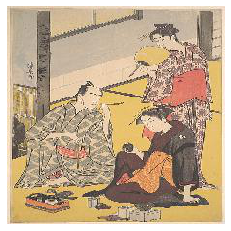

In [10]:
plt.axis('off')
plt.imshow(train_imgs[37])

In [ ]:
np.histogram(train_labels, bins=9)


In [ ]:
np.random.shuffle(test_imgs)
plt.figure(figsize=(16, 16))
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i*4+j+1)
        plt.axis("off")
        plt.imshow(test_imgs[i*4+j])

In [ ]:
import pandas as pd

df = pd.DataFrame(train_labels, columns=['y'])
df.index.name = 'id'
df.index = df.index + 1
df.to_csv('../input/train.csv', float_format='%.5f')

In [ ]:
train_test = np.concatenate([train_imgs, test_imgs], axis=0)

In [ ]:
mean = np.mean(train_test, axis=(0, 1, 2)) 
mean

In [ ]:
std = np.std(train_test, axis=(0, 1, 2)) 
std

In [ ]:
# conpare mean+std
train_mean = np.mean(train_imgs / 255, axis=(0, 1, 2)) 
test_mean = np.mean(test_imgs / 255, axis=(0, 1, 2)) 
train_std = np.std(train_imgs / 255, axis=(0, 1, 2)) 
test_std = np.std(test_imgs / 255, axis=(0, 1, 2)) 
print("train_mean: ", train_mean, "test_mean: ", test_mean,)
print("train_std: ", train_std, "test_std: ", test_std,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
def stratified_groups_kfold(df, target, n_splits=5, random_state=0):
    all_groups = pd.Series(df[target])
    if n_splits > 1:
        folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        for idx_tr, idx_val in folds.split(all_groups, all_groups):
            idx_tr_new = df.iloc[idx_tr]
            idx_val_new = df.iloc[idx_val]
            print(len(idx_tr_new),  len(idx_val_new))
            yield idx_tr_new, idx_val_new
    else:
        idx_tr_new, idx_val_new = train_test_split(df, random_state=random_state, stratify=df[target], test_size=0.1)
        yield idx_tr_new, idx_val_new

In [ ]:
for tr_new, val_new in stratified_groups_kfold(df, "y"):
    print(len(val_new.index.values))

In [ ]:
df